# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [3]:
#Read Data Train
df_train = pd.read_csv("/content/drive/MyDrive/Tubes2_ML/kendaraan_train.csv")
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
#Read Data Test
df_test = pd.read_csv("/content/drive/MyDrive/Tubes2_ML/kendaraan_test.csv")
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


# Data Exploration

In [5]:
#Hapus kolom yang tidak dipakai pada data train
del_cols = [0,3]
df_train.drop(df_train.columns[del_cols], axis = 1, inplace=True)
df_train.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [6]:
#Hapus kolom yang tidak dipakai pada data test
del_cols = [2]
df_test.drop(df_test.columns[del_cols], axis = 1, inplace=True)
df_test.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [7]:
#Cek ukuran data train dan data test
print("Ukuran data train:", df_train.shape)
print("Ukuran data test:", df_test.shape)

Ukuran data train: (285831, 10)
Ukuran data test: (47639, 10)


In [8]:
#Cek tipe data pada data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   Kode_Daerah        271525 non-null  float64
 3   Sudah_Asuransi     271602 non-null  float64
 4   Umur_Kendaraan     271556 non-null  object 
 5   Kendaraan_Rusak    271643 non-null  object 
 6   Premi              271262 non-null  float64
 7   Kanal_Penjualan    271532 non-null  float64
 8   Lama_Berlangganan  271839 non-null  float64
 9   Tertarik           285831 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 21.8+ MB


In [9]:
#Cek tipe data pada data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   Kode_Daerah        47639 non-null  int64 
 3   Sudah_Asuransi     47639 non-null  int64 
 4   Umur_Kendaraan     47639 non-null  object
 5   Kendaraan_Rusak    47639 non-null  object
 6   Premi              47639 non-null  int64 
 7   Kanal_Penjualan    47639 non-null  int64 
 8   Lama_Berlangganan  47639 non-null  int64 
 9   Tertarik           47639 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.6+ MB


In [10]:
#Cek data null pada data train
df_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [11]:
#Cek data null pada data test 
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

# Preprocessing Data

In [12]:
#Mengatasi missing value pada data train
df_train['Umur'] = df_train['Umur'].fillna((df_train['Umur'].mean()))
df_train['Kode_Daerah'] = df_train['Kode_Daerah'].fillna((df_train['Kode_Daerah'].mean()))
df_train['Sudah_Asuransi'] = df_train['Sudah_Asuransi'].fillna((df_train['Sudah_Asuransi'].mean()))
df_train['Premi'] = df_train['Premi'].fillna((df_train['Premi'].mean()))
df_train['Kanal_Penjualan'] = df_train['Kanal_Penjualan'].fillna((df_train['Kanal_Penjualan'].mean()))
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].fillna((df_train['Lama_Berlangganan'].mean()))
df_train['Tertarik'] = df_train['Tertarik'].fillna((df_train['Tertarik'].mean()))

#Data kategorikal diisi dengan mode dari datanya
fill_jenis_kelamin = df_train['Jenis_Kelamin'].mode()
df_train['Jenis_Kelamin'].fillna(fill_jenis_kelamin[0], inplace=True)

fill_umur_kendaraan = df_train['Umur_Kendaraan'].mode()
df_train['Umur_Kendaraan'].fillna(fill_umur_kendaraan[0], inplace=True)

fill_kendaraan_rusak = df_train['Kendaraan_Rusak'].mode()
df_train['Kendaraan_Rusak'].fillna(fill_kendaraan_rusak[0], inplace=True)

In [13]:
#Cek data null pada data train
df_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [14]:
#Ubah kategorik menjadi numerik pada data train
#Kolom "Jenis_Kelamin" -> Wanita = 0, Pria = 1
df_train['Jenis_Kelamin'].replace({
    'Wanita':0,
    'Pria':1
}, inplace = True)

In [15]:
#Ubah kategorik menjadi numerik pada data train
#Kolom "Kendaraan_Rusak" -> Tidak = 0, Pernah = 1
df_train['Kendaraan_Rusak'].replace({
    'Tidak':0,
    'Pernah':1
}, inplace = True)

In [16]:
#Ubah kategorik menjadi numerik pada data train
#Kolom "Umur_Kendaraan" -> <1 Tahun = 0, 1-2 Tahun = 1, >2 Tahun = 2 
df_train['Umur_Kendaraan'].replace({
    '< 1 Tahun':0,
    '1-2 Tahun':1,
    '> 2 Tahun':2
}, inplace = True)

In [17]:
#Ubah kategorik menjadi numerik pada data test
#Kolom "Jenis_Kelamin" -> Wanita = 0, Pria = 1
df_test['Jenis_Kelamin'].replace({
    'Wanita':0,
    'Pria':1
}, inplace = True)

In [18]:
#Ubah kategorik menjadi numerik pada data test
#Kolom "Kendaraan_Rusak" -> Tidak = 0, Pernah = 1
df_test['Kendaraan_Rusak'].replace({
    'Tidak':0,
    'Pernah':1
}, inplace = True)

In [19]:
#Ubah kategorik menjadi numerik pada data test
#Kolom "Umur_Kendaraan" -> <1 Tahun = 0, 1-2 Tahun = 1, >2 Tahun = 2 
df_test['Umur_Kendaraan'].replace({
    '< 1 Tahun':0,
    '1-2 Tahun':1,
    '> 2 Tahun':2
}, inplace = True)

In [20]:
#Cek tipe data pada data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  int64  
 1   Umur               285831 non-null  float64
 2   Kode_Daerah        285831 non-null  float64
 3   Sudah_Asuransi     285831 non-null  float64
 4   Umur_Kendaraan     285831 non-null  int64  
 5   Kendaraan_Rusak    285831 non-null  int64  
 6   Premi              285831 non-null  float64
 7   Kanal_Penjualan    285831 non-null  float64
 8   Lama_Berlangganan  285831 non-null  float64
 9   Tertarik           285831 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 21.8 MB


In [21]:
#Cek tipe data pada data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   Kode_Daerah        47639 non-null  int64
 3   Sudah_Asuransi     47639 non-null  int64
 4   Umur_Kendaraan     47639 non-null  int64
 5   Kendaraan_Rusak    47639 non-null  int64
 6   Premi              47639 non-null  int64
 7   Kanal_Penjualan    47639 non-null  int64
 8   Lama_Berlangganan  47639 non-null  int64
 9   Tertarik           47639 non-null  int64
dtypes: int64(10)
memory usage: 3.6 MB


In [22]:
#Cek data duplikat pada data train
df_train.duplicated().sum()

234

In [23]:
#Cek data duplikat pada data test
df_test.duplicated().sum()

3

In [24]:
#Drop data duplikat pada data train dan test
df_train.drop_duplicates(keep="first", inplace=True)
df_test.drop_duplicates(keep="first", inplace=True)
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [25]:
print(df_train.shape)
print(df_test.shape)

(285597, 10)
(47636, 10)


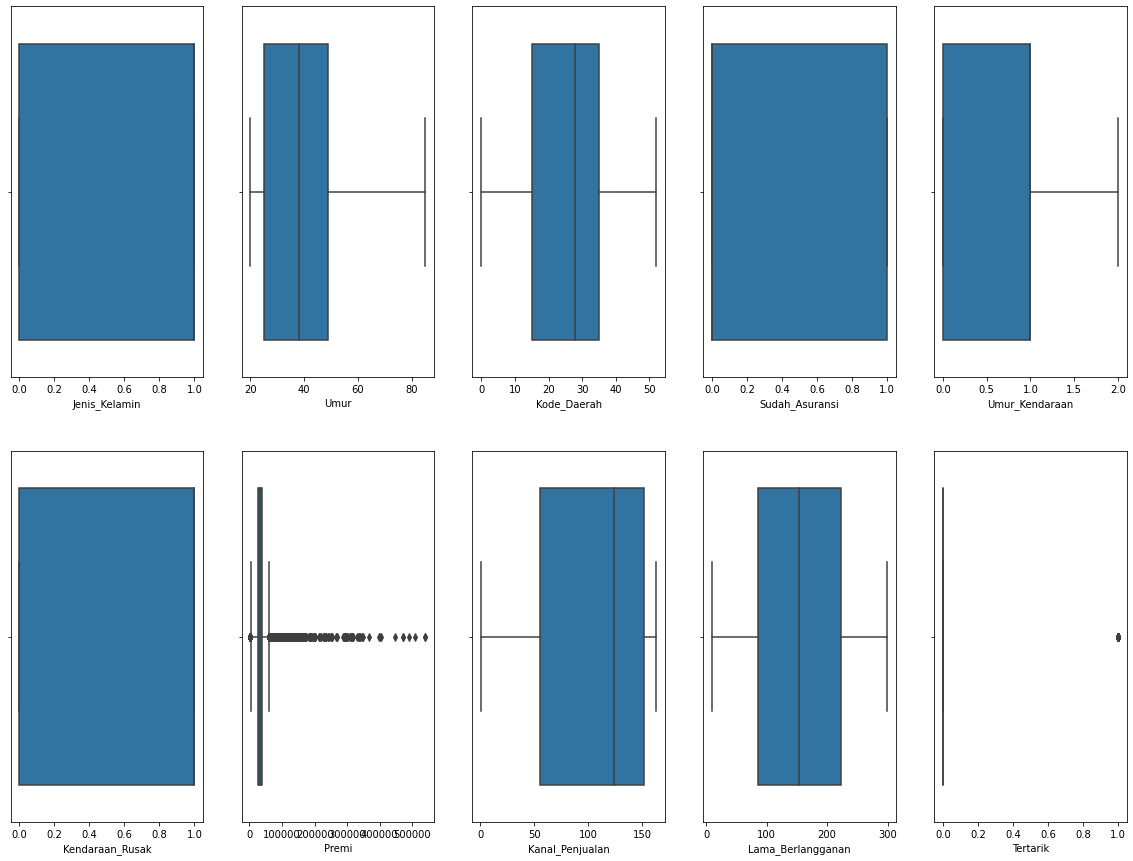

In [26]:
#Melihat outliers
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,15))
for i, ax in zip(df_train.columns, axes.flat):
  sb.boxplot(x=df_train[i], ax=ax)
plt.show()

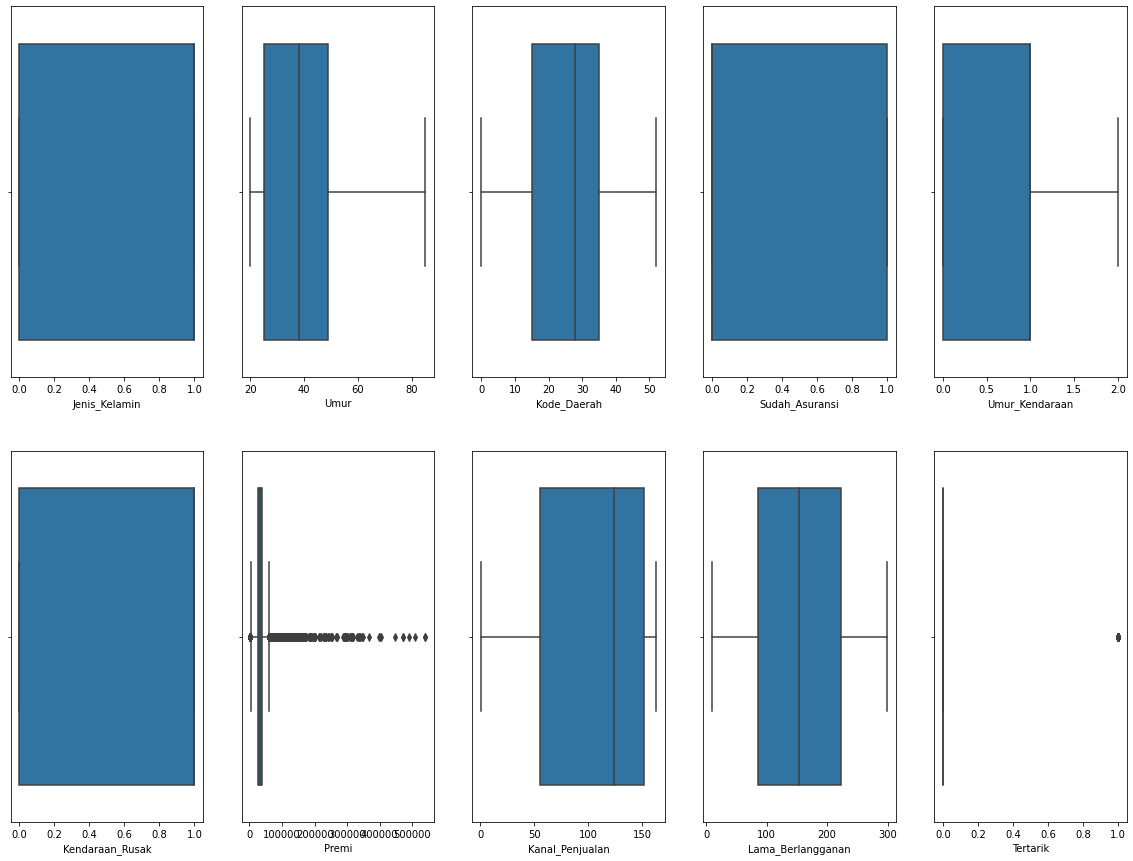

In [27]:
#Melihat outliers
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,15))
for i, ax in zip(df_test.columns, axes.flat):
  sb.boxplot(x=df_train[i], ax=ax)
plt.show()

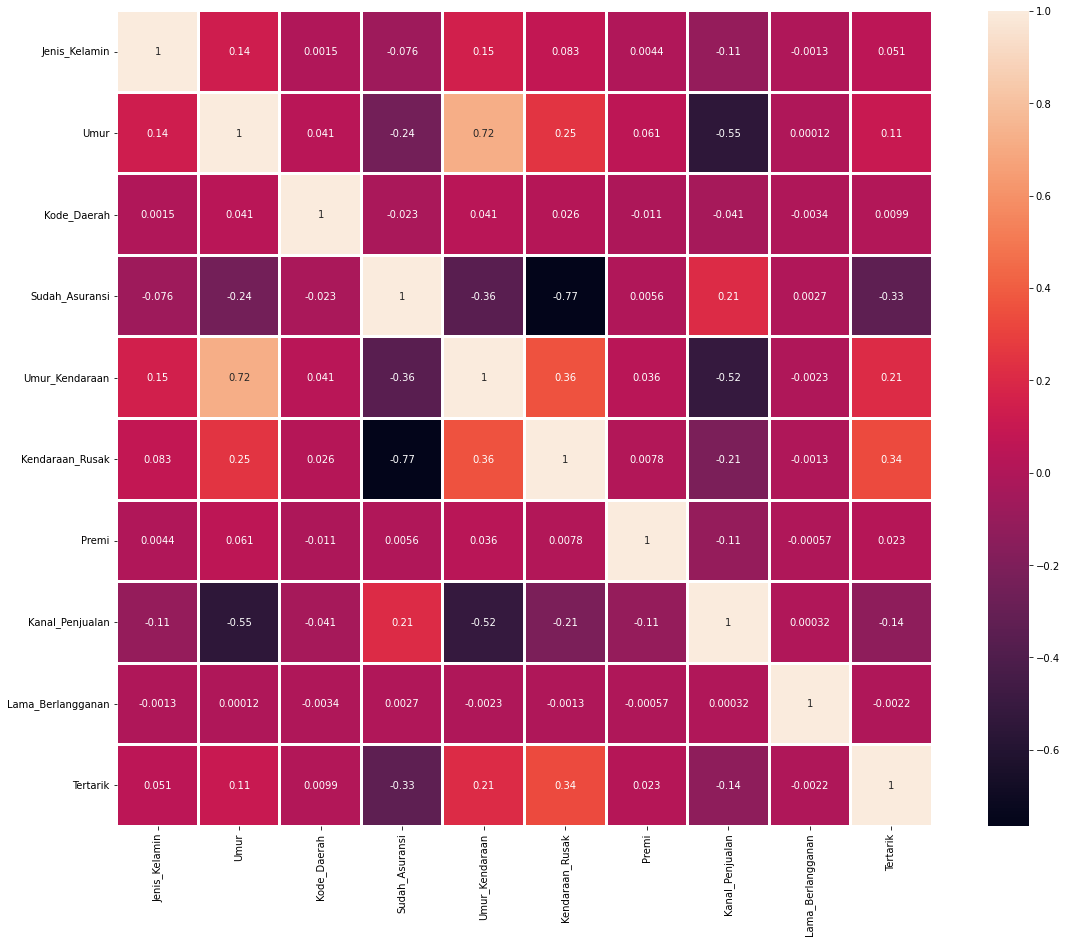

In [28]:
#Membuat korelas dengan plot heatmap (data train)
#semakin gelap = korelasi kecil, semakin terang = korelasi besar
corrmat_df_train = df_train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sb.heatmap(corrmat_df_train, annot=True, square=True, linewidths=2)

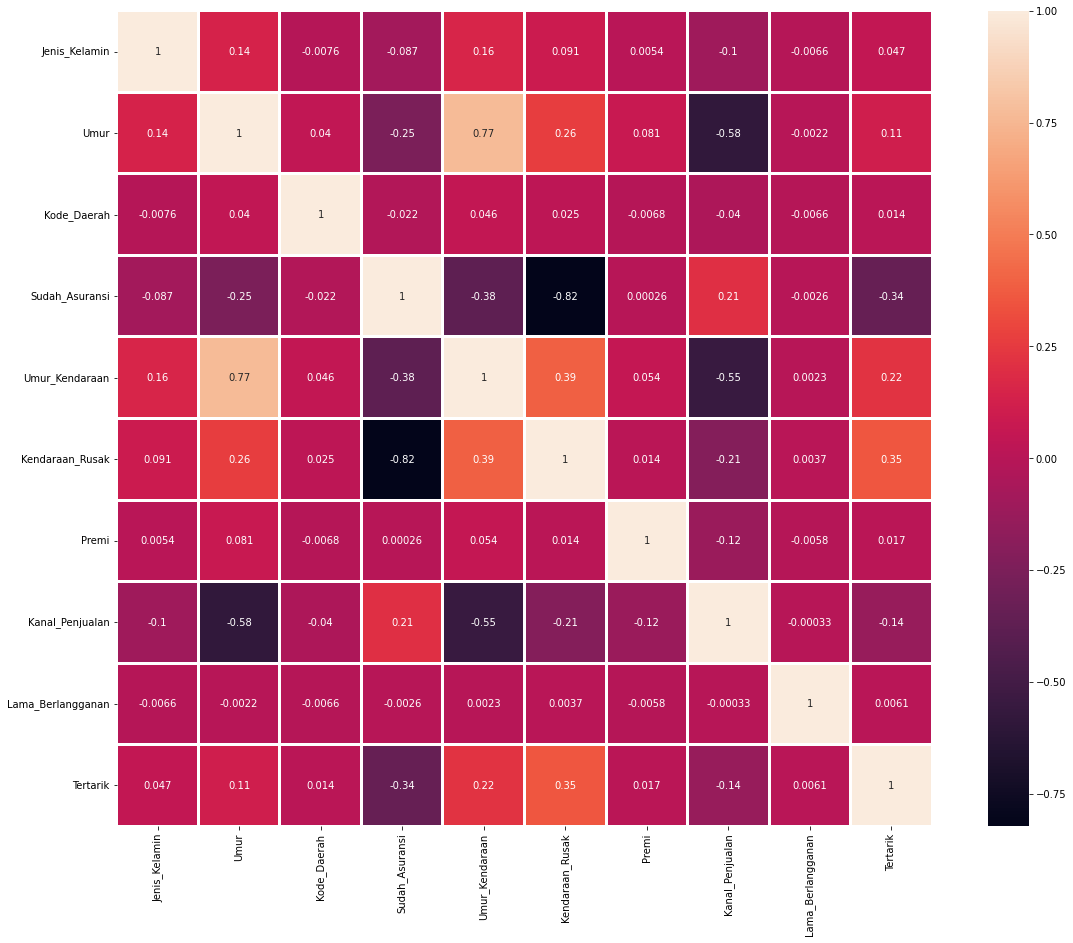

In [29]:
#Membuat korelas dengan plot heatmap (data test)
#semakin gelap = korelasi kecil, semakin terang = korelasi besar
corrmat_df_test = df_test.corr()
f, ax = plt.subplots(figsize=(20, 15))
sb.heatmap(corrmat_df_test, annot=True, square=True, linewidths=2)

In [30]:
#Hapus fitur yang memiliki korelasi kecil dengan label
del_cols = ["Sudah_Asuransi", "Kanal_Penjualan", "Lama_Berlangganan"]
df_train_cleaned = df_train.drop(del_cols, axis=1)
df_test_cleaned = df_test.drop(del_cols, axis=1)

In [31]:
df_train_cleaned.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,0,30.0,33.0,0,0,28029.0,0
1,1,48.0,39.0,2,1,25800.0,0
2,1,21.0,46.0,0,0,32733.0,0
3,0,58.0,48.0,1,0,2630.0,0
4,1,50.0,35.0,2,1,34857.0,0


In [32]:
df_test_cleaned.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,0,49,8,1,1,46963,0
1,1,22,47,0,0,39624,0
2,1,24,28,0,0,110479,0
3,1,46,8,1,0,36266,0
4,1,35,23,1,1,26963,0


# Data Preparation

In [33]:
#Data Split pada data train
x_train = df_train_cleaned.drop("Tertarik", axis=1)
y_train = df_train_cleaned["Tertarik"]

In [34]:
#Data Split pada data test
x_test = df_test_cleaned.drop("Tertarik", axis=1)
y_test = df_test_cleaned["Tertarik"]

In [35]:
#Melihat jumlah data train dan data test
print("Jumlah data train:", x_train.shape[0])
print("Jumlah data test:", x_test.shape[0])

Jumlah data train: 285597
Jumlah data test: 47636


In [36]:
x_train

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0,30.0,33.0,0,0,28029.0
1,1,48.0,39.0,2,1,25800.0
2,1,21.0,46.0,0,0,32733.0
3,0,58.0,48.0,1,0,2630.0
4,1,50.0,35.0,2,1,34857.0
...,...,...,...,...,...,...
285826,0,23.0,4.0,0,0,25988.0
285827,0,21.0,46.0,0,0,44686.0
285828,0,23.0,50.0,0,0,49751.0
285829,1,68.0,7.0,1,0,30503.0


In [37]:
x_test

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0,49,8,1,1,46963
1,1,22,47,0,0,39624
2,1,24,28,0,0,110479
3,1,46,8,1,0,36266
4,1,35,23,1,1,26963
...,...,...,...,...,...,...
47634,1,61,46,2,1,31039
47635,1,41,15,1,1,2630
47636,1,24,29,0,0,33101
47637,1,59,30,1,1,37788


In [38]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 285597, dtype: int64

In [39]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
47634    0
47635    0
47636    0
47637    1
47638    0
Name: Tertarik, Length: 47636, dtype: int64

In [40]:
#Normalisasi data train
def scaler(x_train):  
  return (x_train - x_train.min())/(x_train.max() - x_train.min())

In [41]:
#Normalisasi data test
def scaler(x_test):
  return (x_test - x_test.min())/(x_test.max() - x_test.min())

In [42]:
norm_x_train = scaler(x_train)
norm_x_train

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0.0,0.153846,0.634615,0.0,0.0,0.047251
1,1.0,0.430769,0.750000,1.0,1.0,0.043104
2,1.0,0.015385,0.884615,0.0,0.0,0.056002
3,0.0,0.584615,0.923077,0.5,0.0,0.000000
4,1.0,0.461538,0.673077,1.0,1.0,0.059953
...,...,...,...,...,...,...
285826,0.0,0.046154,0.076923,0.0,0.0,0.043454
285827,0.0,0.015385,0.884615,0.0,0.0,0.078239
285828,0.0,0.046154,0.961538,0.0,0.0,0.087661
285829,1.0,0.738462,0.134615,0.5,0.0,0.051853


In [43]:
norm_x_test = scaler(x_test)
norm_x_test

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Premi
0,0.0,0.446154,0.153846,0.5,1.0,0.082475
1,1.0,0.030769,0.903846,0.0,0.0,0.068822
2,1.0,0.061538,0.538462,0.0,0.0,0.200636
3,1.0,0.400000,0.153846,0.5,0.0,0.062575
4,1.0,0.230769,0.442308,0.5,1.0,0.045268
...,...,...,...,...,...,...
47634,1.0,0.630769,0.884615,1.0,1.0,0.052851
47635,1.0,0.323077,0.288462,0.5,1.0,0.000000
47636,1.0,0.061538,0.557692,0.0,0.0,0.056687
47637,1.0,0.600000,0.576923,0.5,1.0,0.065406


# Klasifikasi

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(norm_x_train, y_train)
y_prediksi1 = knn.predict(norm_x_test)

In [45]:
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec
from sklearn import metrics

# Menghitung accuracy

print("KNN\n")
print("F1-SCORE ",f1(y_test,y_prediksi1,average='macro'))
print("ACCURACY ",acc(y_test,y_prediksi1))
print("PRECISION ",pr(y_test,y_prediksi1,average='macro'))
print("RECALL",rec(y_test,y_prediksi1,average='macro'))

KNN

F1-SCORE  0.5636147392759003
ACCURACY  0.8567469980686876
PRECISION  0.6064523448725221
RECALL 0.5533820143315953


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediksi1))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     41776
           1       0.32      0.15      0.21      5860

    accuracy                           0.86     47636
   macro avg       0.61      0.55      0.56     47636
weighted avg       0.82      0.86      0.83     47636



In [47]:
from sklearn.naive_bayes import GaussianNB

# Import fungsi GaussianNB
naive = GaussianNB()

# Input data train
naive.fit(norm_x_train, y_train)

# Menentukan hasil prediksi
y_prediksi2 = naive.predict(norm_x_test)

In [48]:
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec
from sklearn import metrics

# Menghitung accuracy

print("NAIVE BAYES\n")
print("F1-SCORE ",f1(y_test,y_prediksi2,average='macro'))
print("ACCURACY ",acc(y_test,y_prediksi2))
print("PRECISION ",pr(y_test,y_prediksi2,average='macro'))
print("RECALL",rec(y_test,y_prediksi2,average='macro'))

NAIVE BAYES

F1-SCORE  0.6150825246953129
ACCURACY  0.7267192879334957
PRECISION  0.6171393062845351
RECALL 0.7431087692788322


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediksi2))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     41776
           1       0.28      0.76      0.41      5860

    accuracy                           0.73     47636
   macro avg       0.62      0.74      0.62     47636
weighted avg       0.87      0.73      0.77     47636



In [50]:
from sklearn.tree import DecisionTreeClassifier

# Import fungsi Decision Tree
dec_tree = DecisionTreeClassifier()

# Input data train
dec_tree.fit(norm_x_train, y_train)

# Menentukan hasil prediksi
y_prediksi3 = dec_tree.predict(norm_x_test)

In [51]:
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pr
from sklearn.metrics import recall_score as rec
from sklearn import metrics

# Menghitung accuracy

print("Decision Tree\n")
print("F1-SCORE ",f1(y_test,y_prediksi3,average='macro'))
print("ACCURACY ",acc(y_test,y_prediksi3))
print("PRECISION ",pr(y_test,y_prediksi3,average='macro'))
print("RECALL",rec(y_test,y_prediksi3,average='macro'))

Decision Tree

F1-SCORE  0.5822987773249384
ACCURACY  0.829498698463347
PRECISION  0.5877028437402576
RECALL 0.5781190238724849


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediksi3))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     41776
           1       0.28      0.24      0.26      5860

    accuracy                           0.83     47636
   macro avg       0.59      0.58      0.58     47636
weighted avg       0.82      0.83      0.82     47636



#Evaluasi

In [53]:
print("Accuracy of KNN classification:",acc(y_test,y_prediksi1))
print("Accuracy of Naive Bayes classification:",acc(y_test,y_prediksi2))
print("Accuracy of Decision Tree classification:",acc(y_test,y_prediksi3))

Accuracy of KNN classification: 0.8567469980686876
Accuracy of Naive Bayes classification: 0.7267192879334957
Accuracy of Decision Tree classification: 0.829498698463347
